## 1.Loading the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rahul\AppData\Local\Temp\ipykernel_18152\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
pd.options.display.max_columns=None

In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [6]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

## 2.Loading the Dataset

In [9]:
df_CC=pd.read_csv('BankChurners.csv')

In [10]:
df_CC.shape

(10127, 23)

In [11]:
df_CC.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

## 3.Exploratory Data Analysis

In [12]:
#dropping the last two columns

In [13]:
df_CC=df_CC.iloc[:,:21]

In [14]:
df_CC.shape

(10127, 21)

In [15]:
df_CC.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [16]:
#We can drop the clientnum column since we do not require it for building the model

In [17]:
df_CC=df_CC.drop('CLIENTNUM',axis=1)

In [18]:
df_CC.shape

(10127, 20)

In [19]:
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [20]:
#Summary Statistics

In [21]:
df_CC.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [22]:
#Checking for Outliers wrt target column

In [23]:
cols=df_CC.select_dtypes(include=np.number)
cols.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [24]:
cols=['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

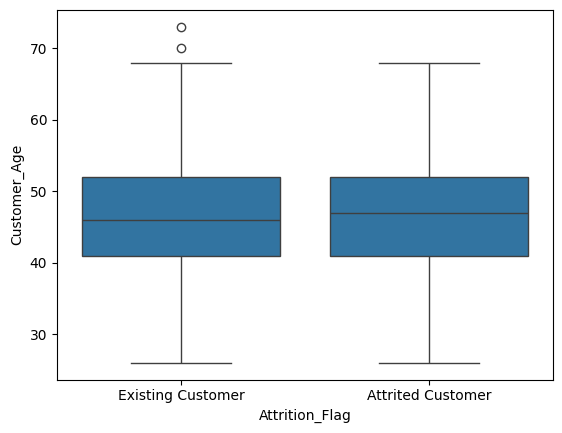

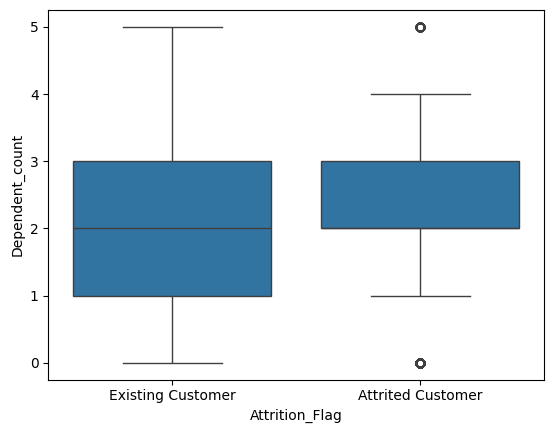

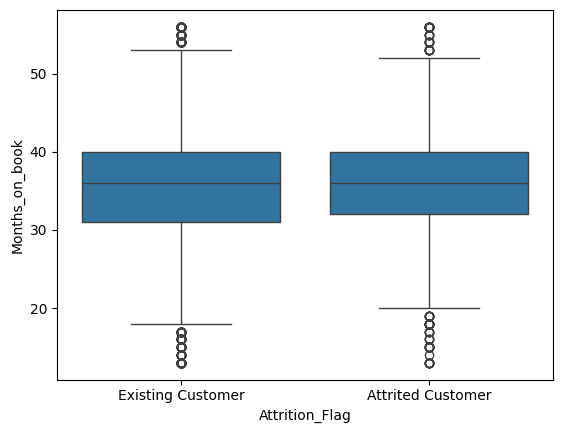

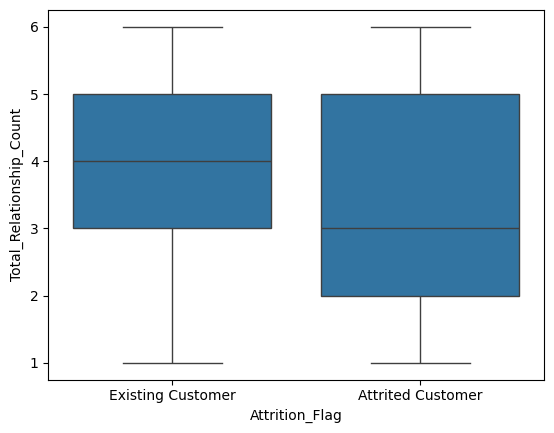

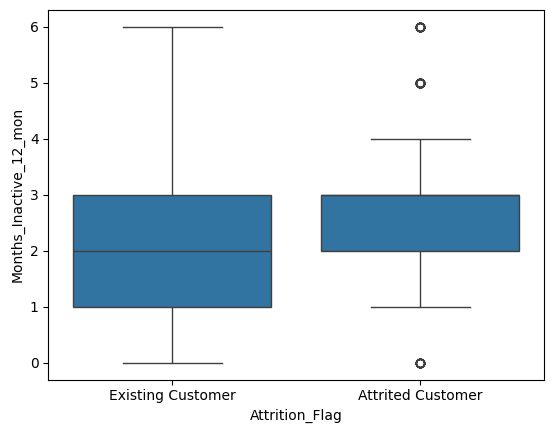

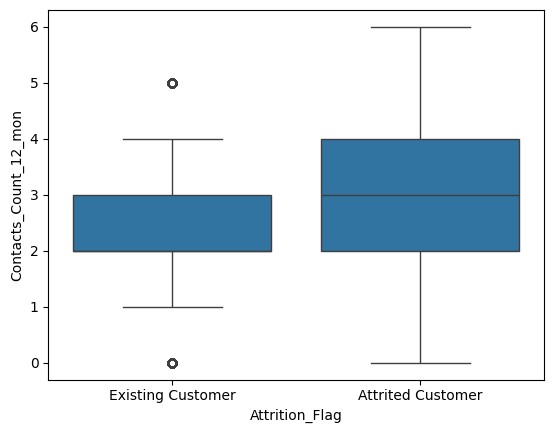

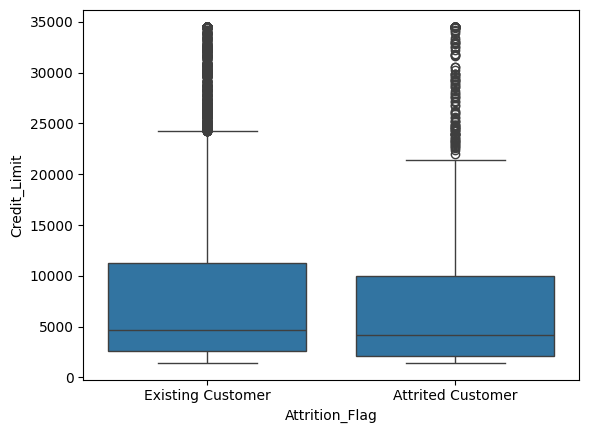

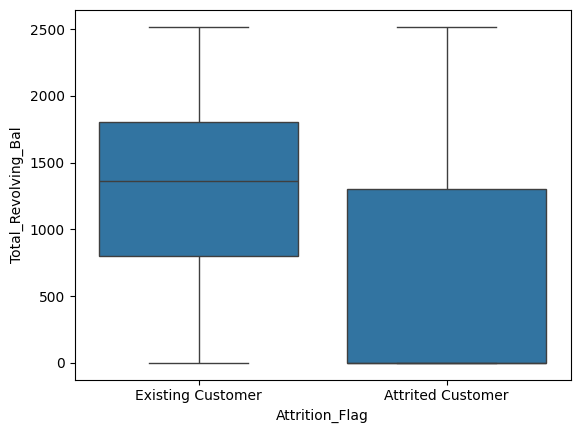

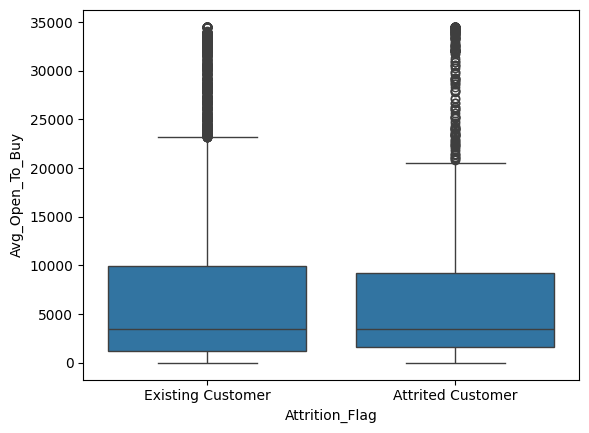

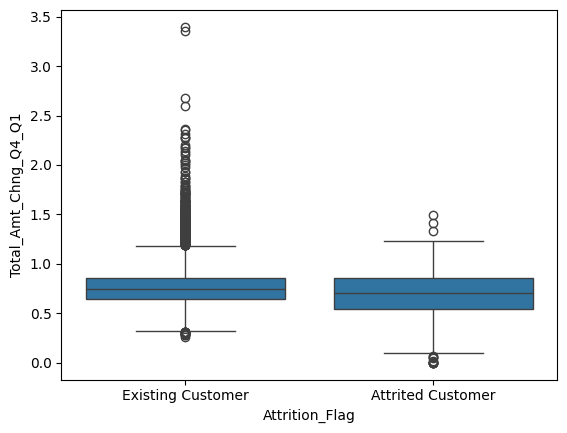

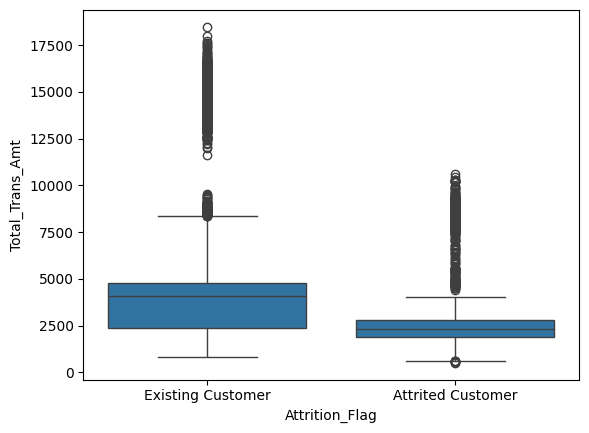

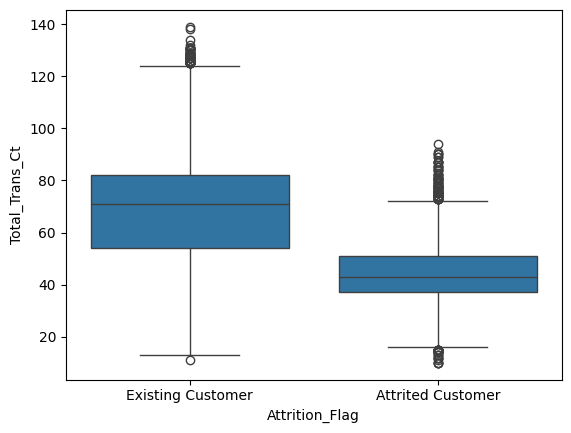

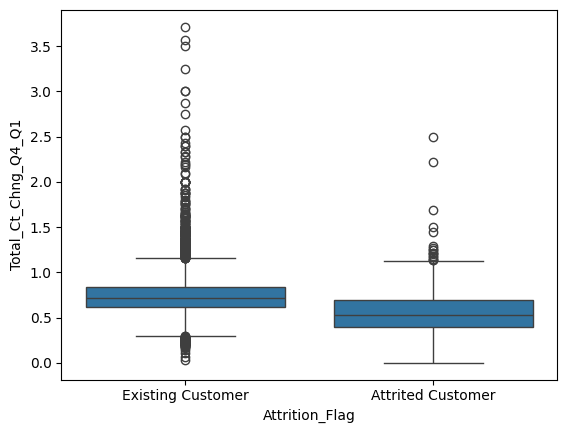

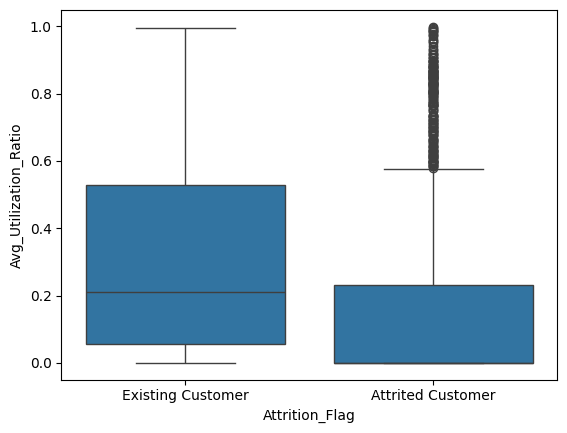

In [25]:
for col in cols:
    sns.boxplot(x='Attrition_Flag',y=df_CC[col],data=df_CC)
    plt.show()

We can see there are outliers in various columns.Our next step would be to treat them.

We can treat the outliers in age column by converting into a categorical data.

In [26]:
df_CC.Customer_Age.min(),df_CC.Customer_Age.max()

(26, 73)

In [27]:
df_CC['age_cat']=pd.cut(df_CC['Customer_Age'],bins=[25,40,55,75],labels=['young','middle','old'])

In [28]:
df_CC.age_cat.value_counts()

age_cat
middle    6399
young     2397
old       1331
Name: count, dtype: int64

In [29]:
#Dropping the Customer Age column since we do not require it for model building

In [30]:
df_CC=df_CC.drop('Customer_Age',axis=1)

In [31]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-((data[variable].quantile(.75)-data[variable].quantile(.25))*1.5)
    UL=data[variable].quantile(.75)+((data[variable].quantile(.75)-data[variable].quantile(.25))*1.5)
    return LL,UL

In [32]:
cols=['Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [33]:
for col in cols:
    LL,UL=boundaries(df_CC,col)
    
    df_CC[col]=np.where(df_CC[col]<LL,LL,
                       np.where(df_CC[col]>UL,UL,df_CC[col]))

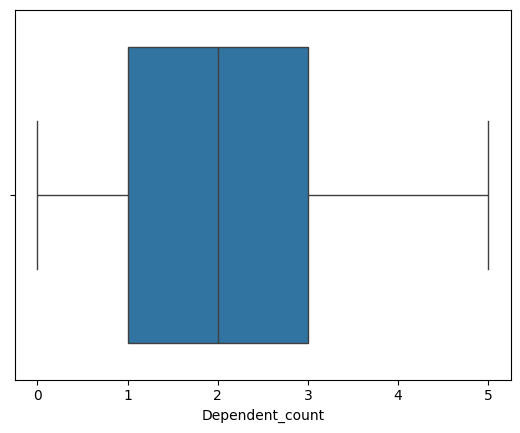

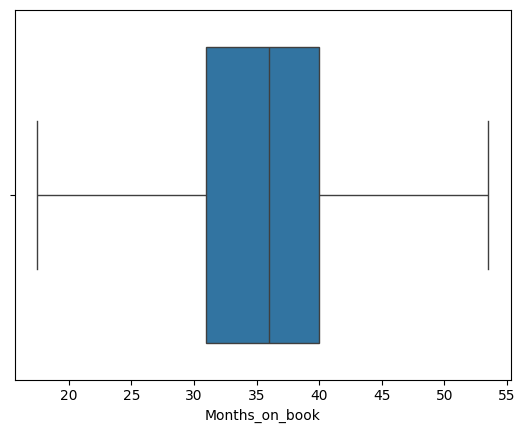

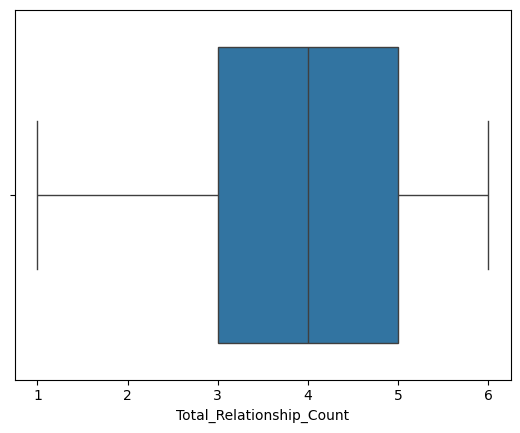

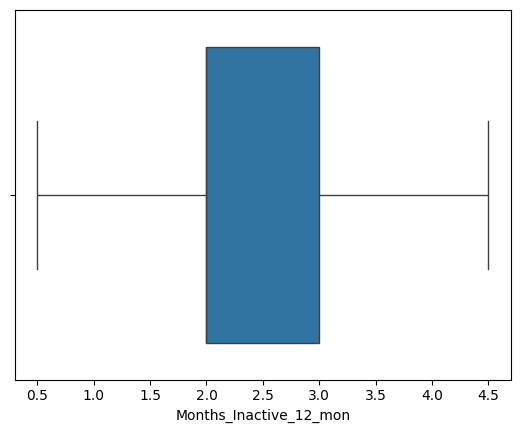

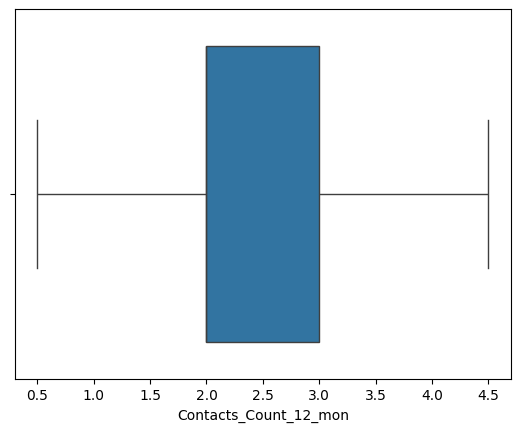

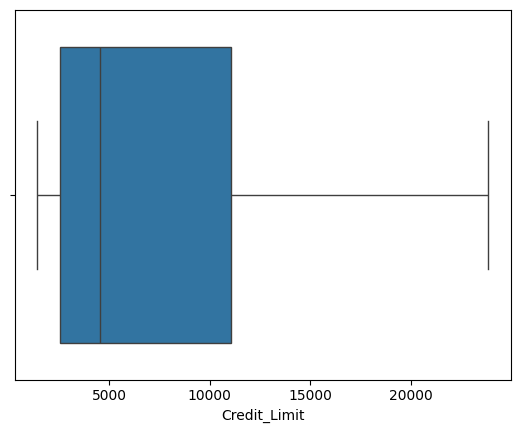

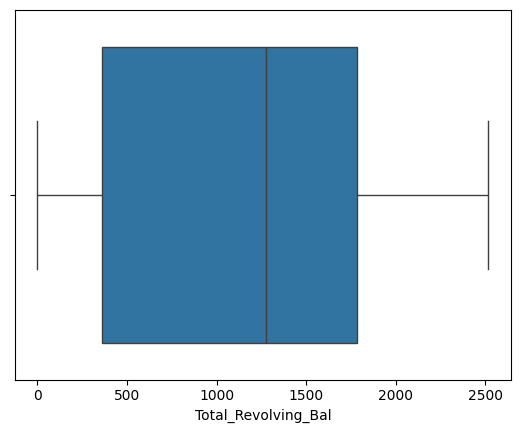

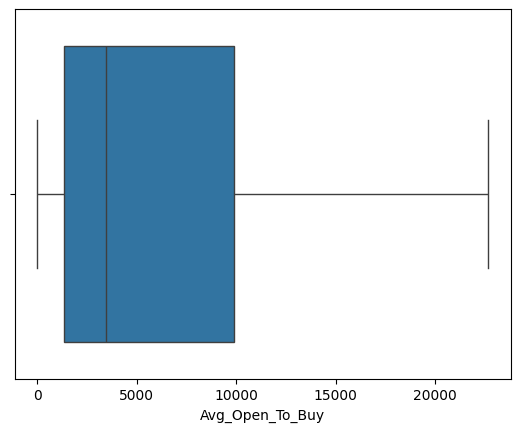

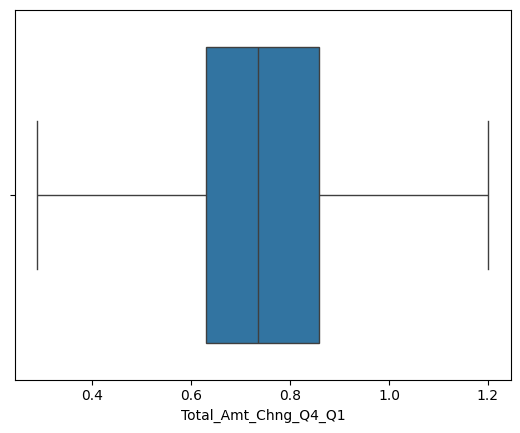

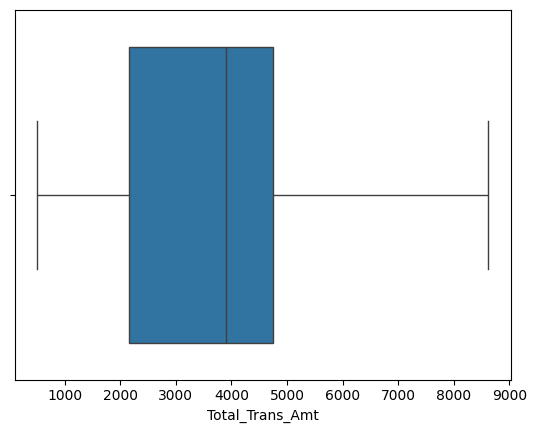

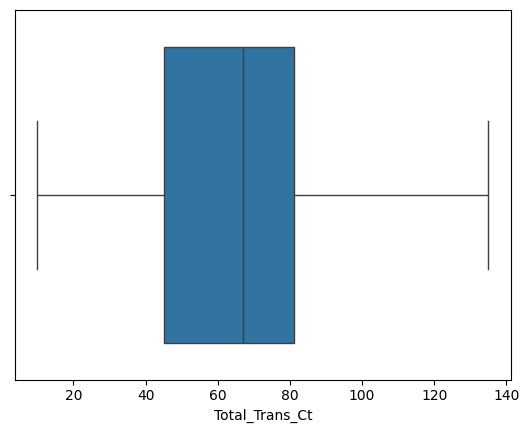

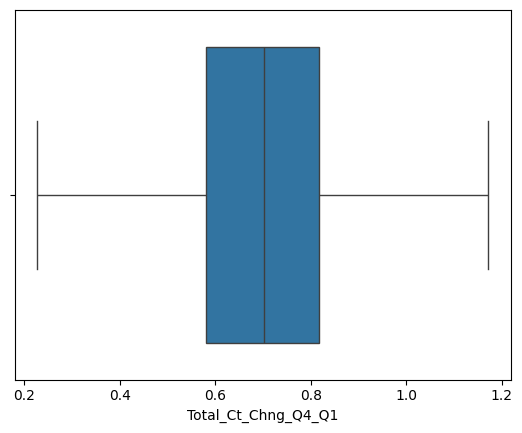

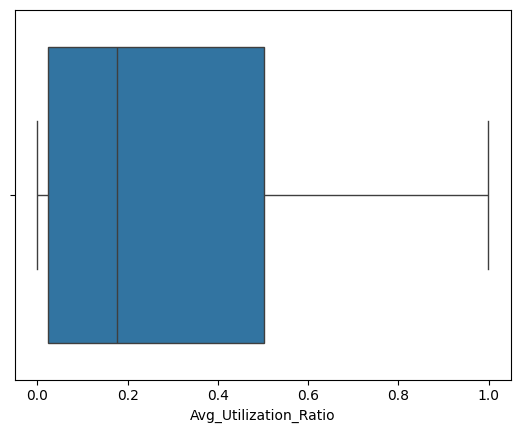

In [34]:
for col in cols:
    sns.boxplot(x=df_CC[col],data=df_CC)
    plt.show()

In [35]:
#Testing for Normality

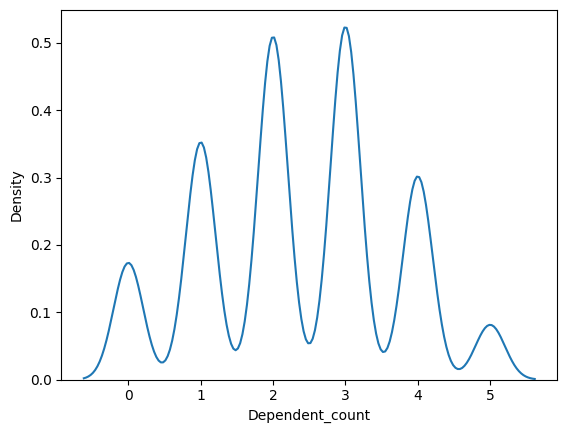

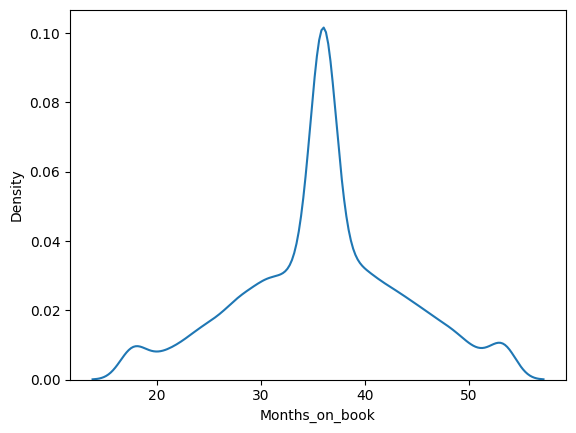

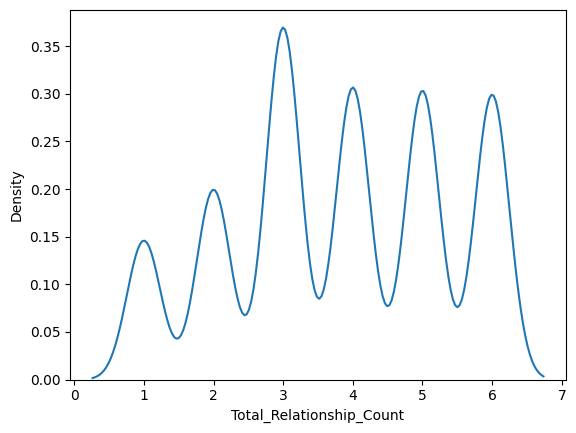

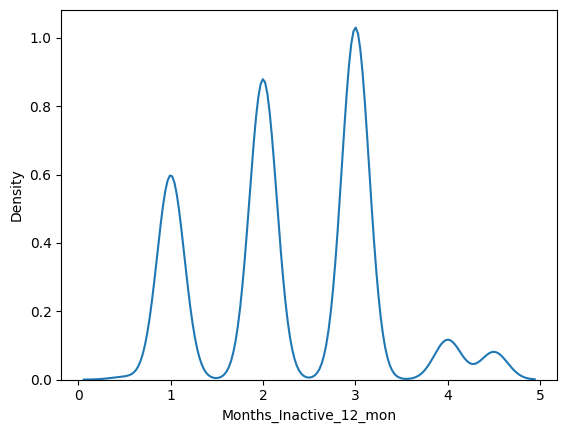

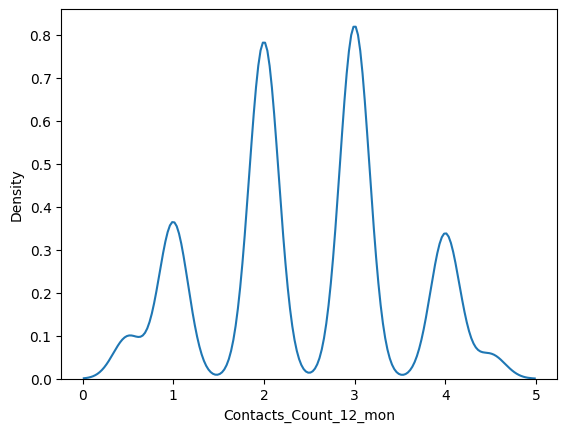

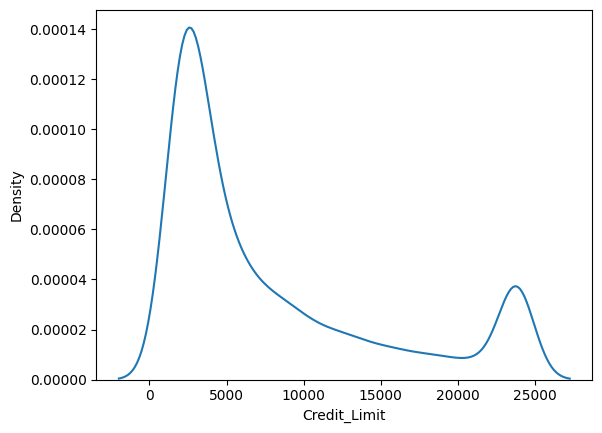

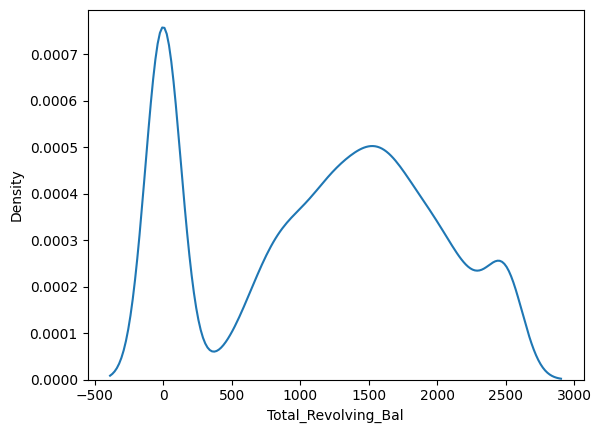

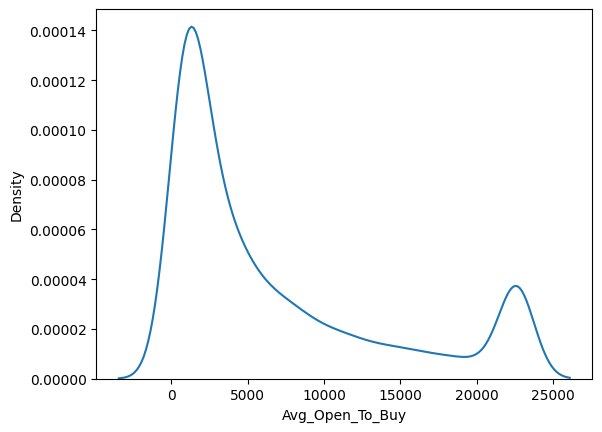

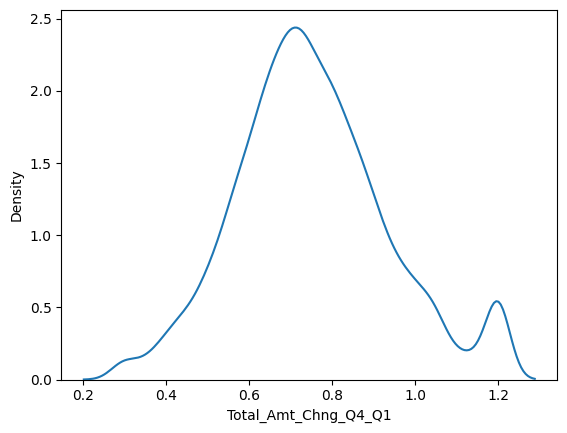

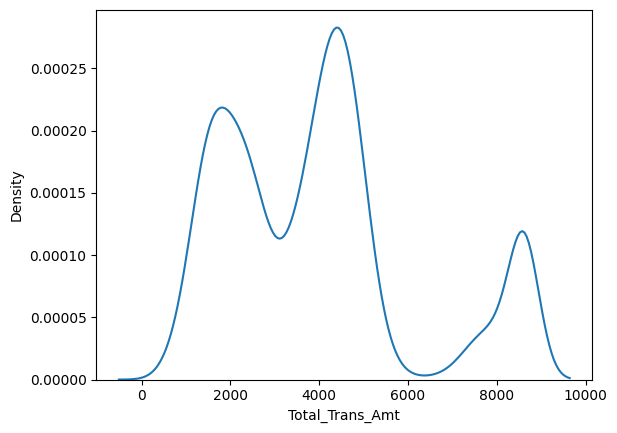

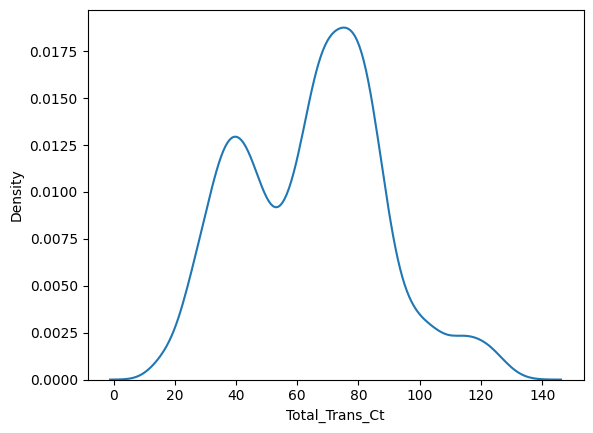

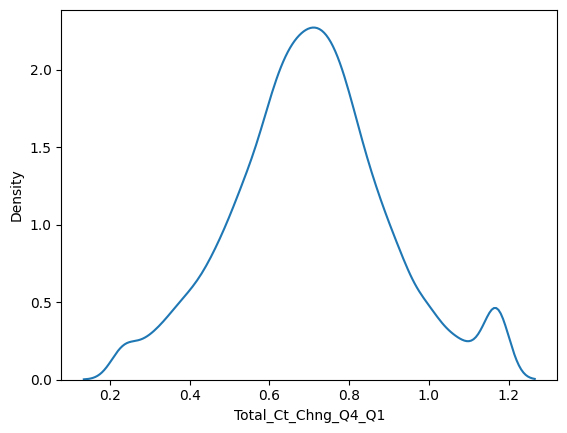

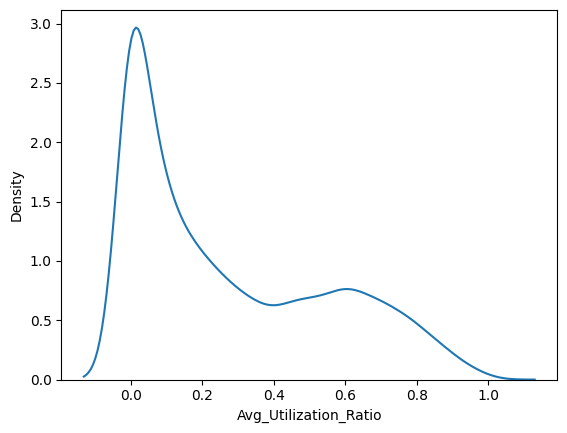

In [36]:
for col in cols:
    sns.kdeplot(x=df_CC[col],data=df_CC)
    plt.show()

In [37]:
#Checking for Linear Relationships(Linearity)

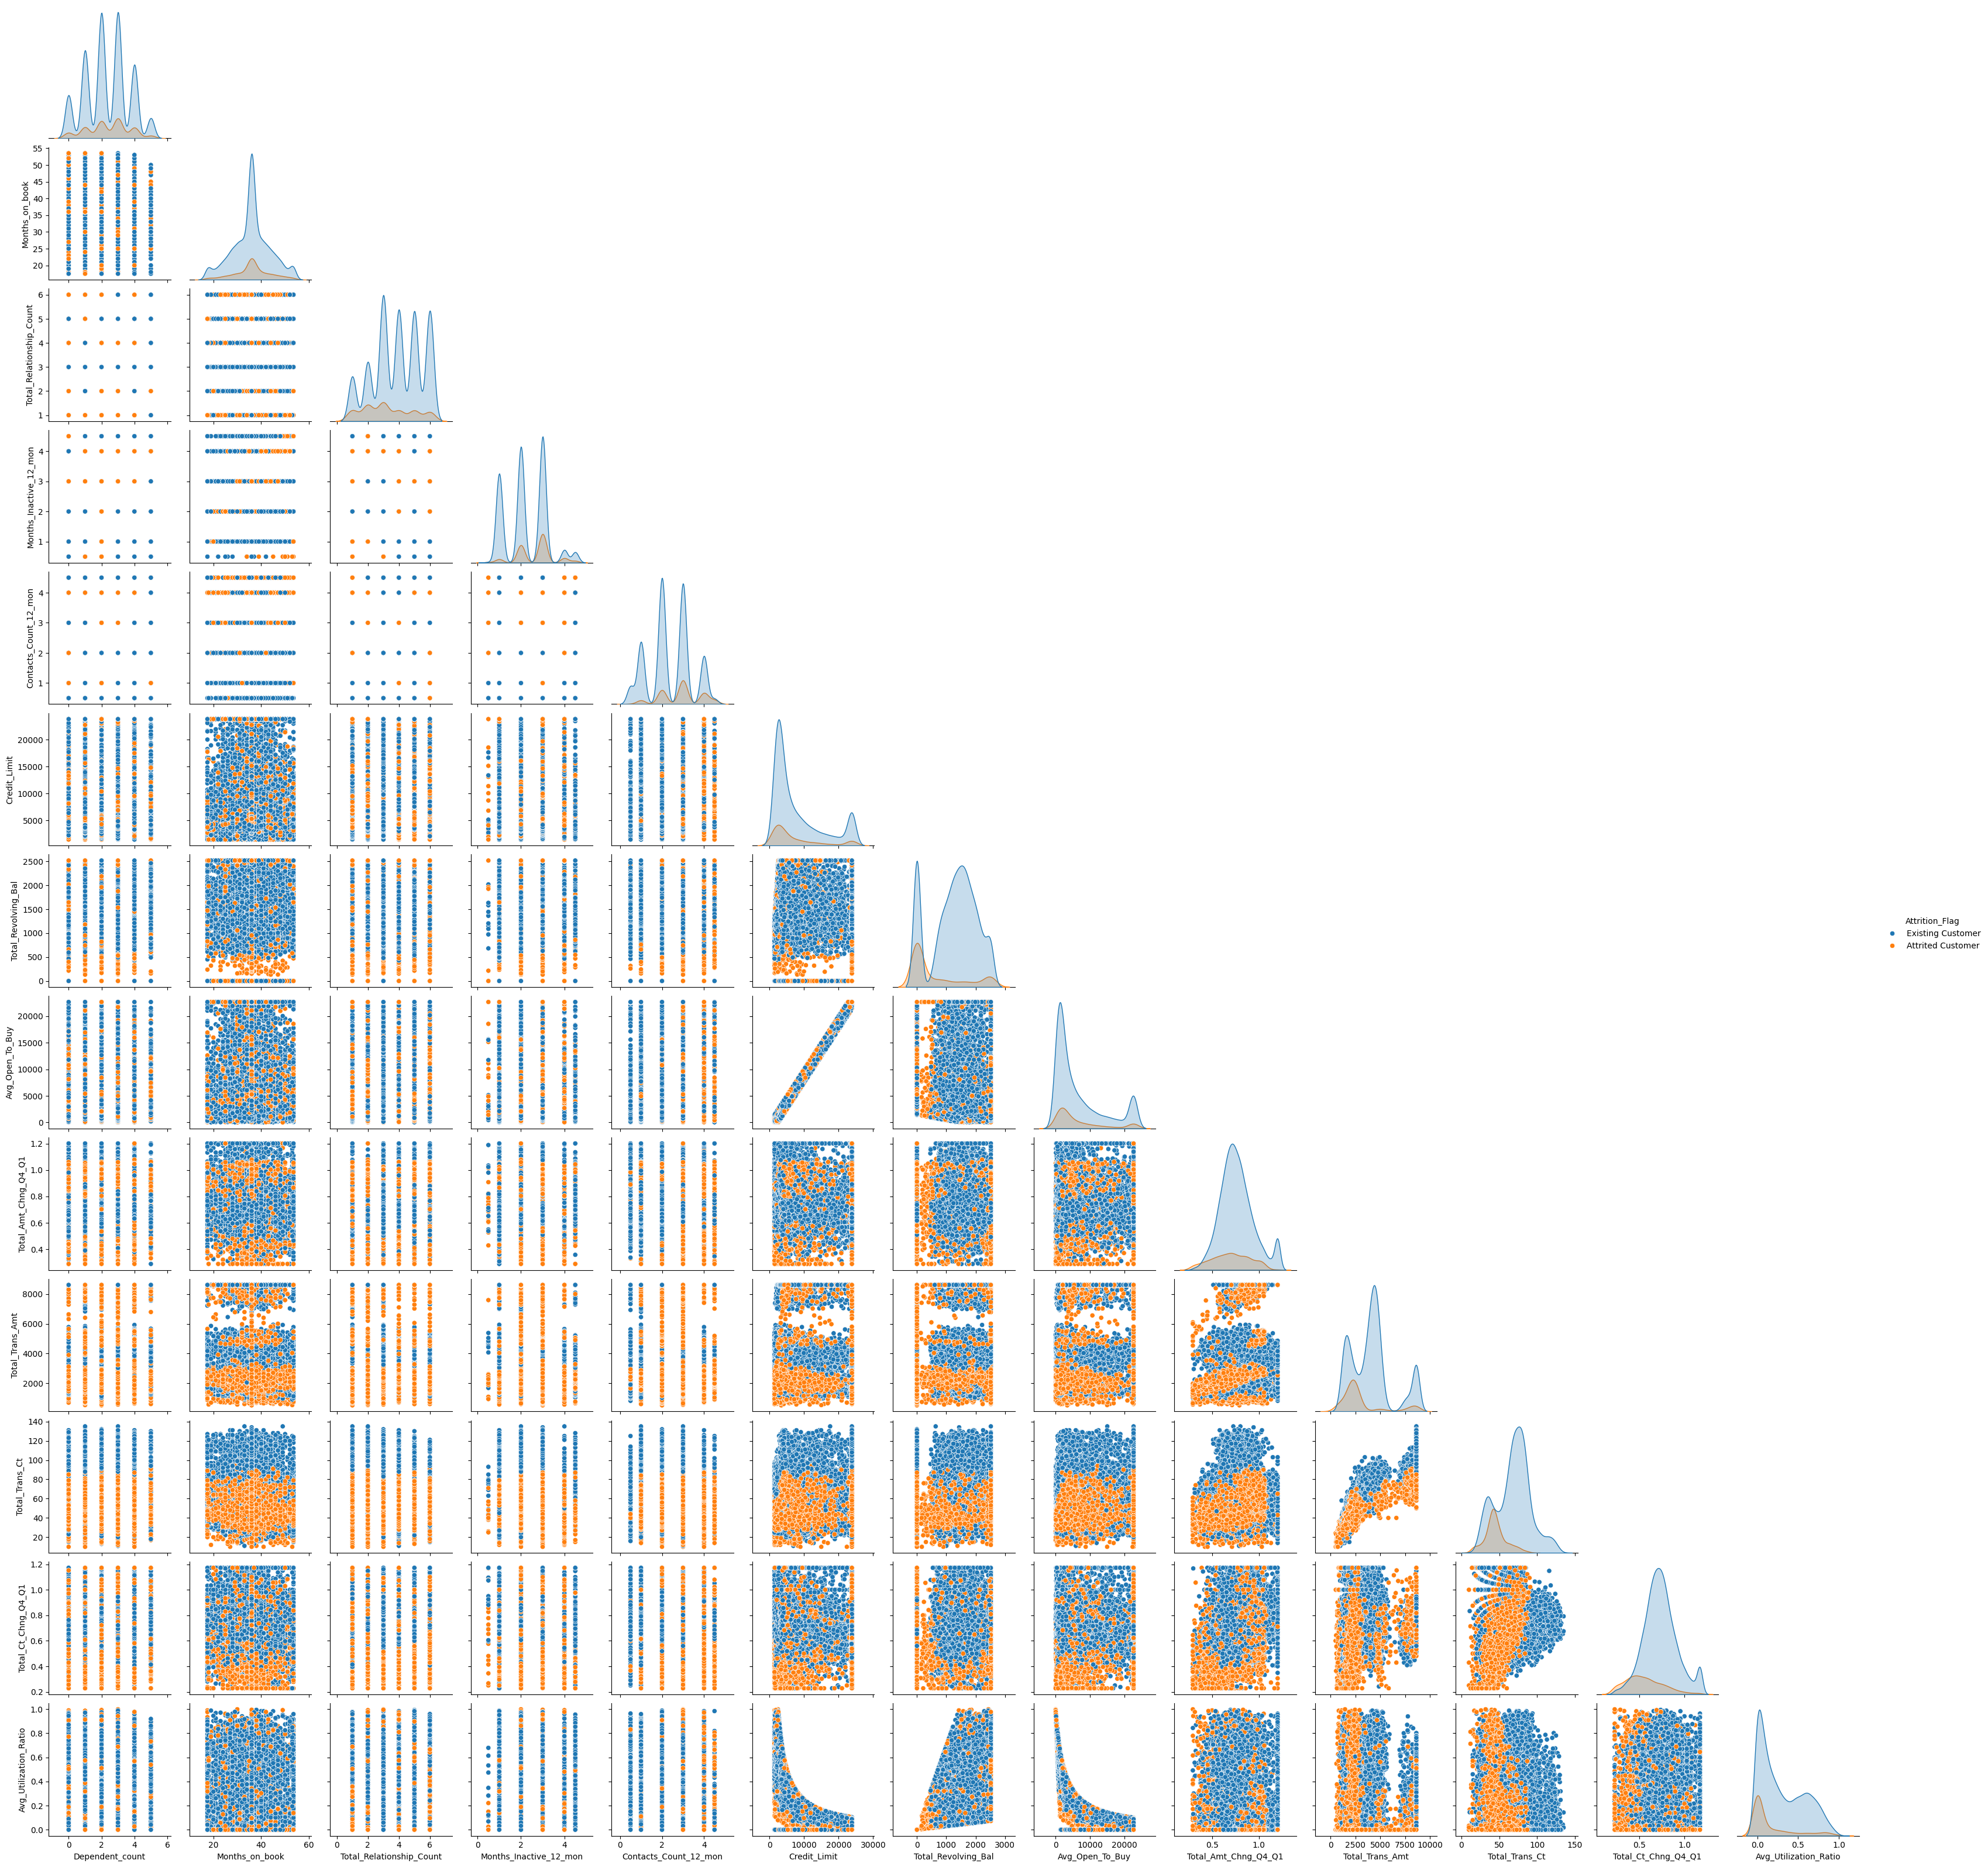

In [38]:
sns.pairplot(data=df_CC,hue='Attrition_Flag',corner=True)
plt.show()

We can see that there is a linear relationship existing between Avg_Open_to_Buy and Credit_Limit. We have to remove one of them to avoid linearity in data.

In [52]:
#Converting the target column into numerical column

In [53]:
def flag(x):
    if x=='Existing Customer':
        x=0
    if x=='Attrited Customer':
        x=1
    return x    

In [54]:
df_CC['Attrition_Flag']=df_CC['Attrition_Flag'].apply(flag)

In [55]:
df_CC.Attrition_Flag.value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [56]:
#Creating a backup file

In [57]:
df_CC1=df_CC.copy(deep=True)

## 4.Dummy Encoding the Categorical Variables

In [58]:
df_CC1_dummy=pd.get_dummies(df_CC1,drop_first=True)

In [59]:
df_CC1_dummy.head()

Attrition_Flag  Dependent_count  Months_on_book  Total_Relationship_Count  \
0               0              3.0            39.0                       5.0   
1               0              5.0            44.0                       6.0   
2               0              3.0            36.0                       4.0   
3               0              4.0            34.0                       3.0   
4               0              3.0            21.0                       5.0   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                     1.0                    3.0       12691.0   
1                     1.0                    2.0        8256.0   
2                     1.0                    0.5        3418.0   
3                     4.0                    1.0        3313.0   
4                     1.0                    0.5        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                777.0          11914.0                 1.201   
1                864.0           7392.0                 1.201   
2                  0.0           3418.0                 1.201   
3               2517.0            796.0                 1.201   
4                  0.0           4716.0                 1.201   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0           1144.0            42.0                1.172   
1           1291.0            33.0                1.172   
2           1887.0            20.0                1.172   
3           1171.0            20.0                1.172   
4            816.0            28.0                1.172   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                  0.061      True                      False   
1                  0.105     False                      False   
2                  0.000      True                      False   
3                  0.760     False                      False   
4                  0.000      True                      False   

   Education_Level_Graduate  Education_Level_High School  \
0                     False                         True   
1                      True                        False   
2                      True                        False   
3                     False                         True   
4                     False                        False   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                          False                       False   
1                          False                       False   
2                          False                       False   
3                          False                       False   
4                          False                        True   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                    False                    True                  False   
1                    False                   False                   True   
2                    False                    True                  False   
3                    False                   False                  False   
4                    False                    True                  False   

   Marital_Status_Unknown  Income_Category_$40K - $60K  \
0                   False                        False   
1                   False                        False   
2                   False                        False   
3                    True                        False   
4                   False                        False   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                         True                         False   
1                        False                         False   
2                        False                          True   
3                        False                         False   
4                         True                         False   

   Income_Category_Less than $40K  Income_Cat

In [60]:
# test for correlation

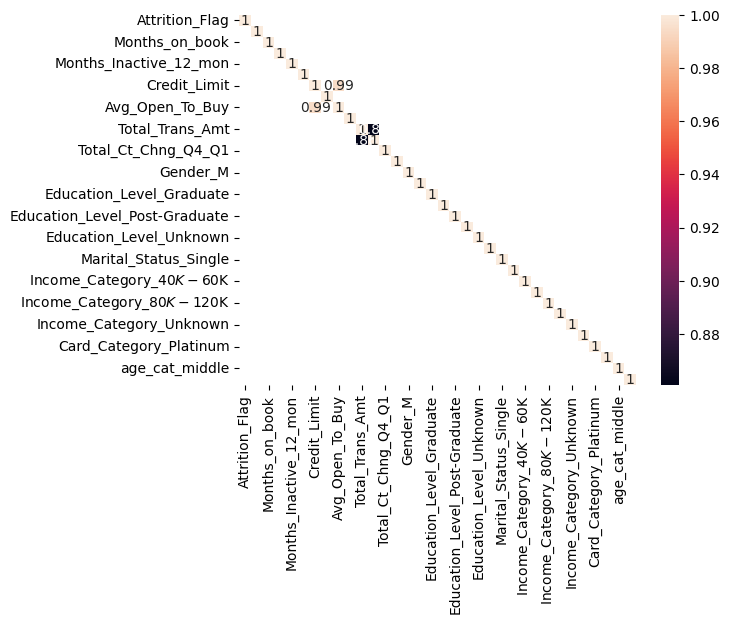

In [61]:
vcorr=df_CC1_dummy.corr()
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

## 5.Separating into independent and dependent features

In [62]:
X=df_CC1_dummy.drop('Attrition_Flag',axis=1)
y=df_CC1_dummy['Attrition_Flag']

In [63]:
X.shape,y.shape

((10127, 33), (10127,))

We can see that there is correlation existing between some features. We can treat it using PCA.

## 6.PCA

In [64]:
#Scaling the data

In [65]:
mn=MinMaxScaler()
X_scaled=mn.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

Dependent_count  Months_on_book  Total_Relationship_Count  \
0              0.6        0.597222                       0.8   
1              1.0        0.736111                       1.0   
2              0.6        0.513889                       0.6   
3              0.8        0.458333                       0.4   
4              0.6        0.097222                       0.8   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                   0.125                  0.625      0.502399   
1                   0.125                  0.375      0.304389   
2                   0.125                  0.000      0.088388   
3                   0.875                  0.125      0.083700   
4                   0.125                  0.000      0.146339   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0             0.308701         0.525692                   1.0   
1             0.343266         0.326114                   1.0   
2             0.000000         0.150721                   1.0   
3             1.000000         0.034999                   1.0   
4             0.000000         0.208008                   1.0   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0         0.078182           0.256                  1.0   
1         0.096310           0.184                  1.0   
2         0.169806           0.080                  1.0   
3         0.081512           0.080                  1.0   
4         0.037735           0.144                  1.0   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0               0.061061       1.0                        0.0   
1               0.105105       0.0                        0.0   
2               0.000000       1.0                        0.0   
3               0.760761       0.0                        0.0   
4               0.000000       1.0                        0.0   

   Education_Level_Graduate  Education_Level_High School  \
0                       0.0                          1.0   
1                       1.0                          0.0   
2                       1.0                          0.0   
3                       0.0                          1.0   
4                       0.0                          0.0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         1.0   

   Education_Level_Unknown  Marital_Status_Married  Marital_Status_Single  \
0                      0.0                     1.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     1.0                    0.0   
3                      0.0                     0.0                    0.0   
4                      0.0                     1.0                    0.0   

   Marital_Status_Unknown  Income_Category_$40K - $60K  \
0                     0.0                          0.0   
1                     0.0                          0.0   
2                     0.0                          0.0   
3                     1.0                          0.0   
4                     0.0                          0.0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                          1.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           1.0   
3                          0.0                           0.0   
4                          1.0                           0.0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                             0.0                      0.0   
1                

In [66]:
pca=PCA()

In [67]:
pca_CC=pca.fit_transform(df_X_scaled)
pca_CC

array([[ 8.43400166e-01, -7.26025852e-01, -1.05800920e-01, ...,
        -4.85157441e-02, -1.85024779e-03,  1.45911374e-03],
       [-6.24331352e-01,  6.79480543e-01, -6.10965534e-01, ...,
         5.01825108e-02, -1.91726747e-03, -6.13270475e-04],
       [ 6.46102420e-01, -7.64742431e-01, -2.68668591e-01, ...,
         1.36960680e-01,  9.79820293e-03,  2.00439495e-03],
       ...,
       [-6.52724267e-01, -6.12006327e-01, -3.80810984e-01, ...,
         3.61412338e-01, -9.63789092e-03,  2.15982429e-03],
       [ 4.19417763e-01,  1.30662234e-01,  4.85275014e-01, ...,
         3.36511722e-01, -6.89598161e-03,  3.57806837e-03],
       [-5.40732118e-01, -6.30604289e-01, -5.31880833e-01, ...,
         3.41781253e-01,  1.26276403e-03, -7.52377632e-03]])

In [68]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.14581274 0.26616601 0.34856271 0.42214494 0.48116516 0.53273871
 0.58231392 0.62396792 0.66510071 0.70404978 0.74124894 0.7721998
 0.80110169 0.82983073 0.8505782  0.86959697 0.88650078 0.9017793
 0.9166584  0.93018942 0.94335997 0.95508581 0.96577325 0.97334624
 0.97924745 0.98397695 0.98845449 0.99237054 0.99533046 0.9977922
 0.99944462 0.99998624 1.        ]


With 28 features, we can cater 99% variance.

In [69]:
df_pca_CC=pd.DataFrame(pca_CC[:,:28])
df_pca_CC.head()

0         1         2         3         4         5         6   \
0  0.843400 -0.726026 -0.105801 -0.571343 -0.047468 -0.576503  0.521229   
1 -0.624331  0.679481 -0.610966  0.719636 -0.254350 -0.137302  0.109612   
2  0.646102 -0.764742 -0.268669  0.728566 -0.064140 -0.243565  0.019064   
3 -0.945036  0.059881  0.358238 -0.550551 -0.199919 -0.522949  0.578393   
4  0.554380 -0.642075  0.680081 -0.280568 -0.099373 -0.145694 -0.595580   

         7         8         9         10        11        12        13  \
0  0.069406  0.762090  0.037761  0.142479 -0.058477 -0.062872 -0.289845   
1  0.008620  0.154325 -0.396120  0.192086 -0.076022 -0.045852 -0.468689   
2 -0.041499 -0.175503 -0.685496  0.007351 -0.088505 -0.130423  0.620883   
3  0.057600 -0.419187  0.309678  0.188408  1.162187  0.018987 -0.117659   
4  0.793225  0.852020 -0.023949 -0.094623  0.178138 -0.694702  0.134525   

         14        15        16        17        18        19        20  \
0 -0.333935 -0.137686 -0.138123  0.223517 -0.326852  0.642573  0.002527   
1 -0.500664 -0.050452  0.205852  0.485013 -0.263245  0.665911  0.047235   
2 -0.623103 -0.017987  0.320114 -0.004359 -0.334050  0.694943 -0.014171   
3  0.078586 -0.075831  0.477678  0.113699  0.487489  0.859969  0.085360   
4 -0.581411 -0.116523  0.472453  0.041345 -0.255312  0.621416  0.005441   

         21        22        23        24        25        26        27  
0 -0.066837 -0.062085 -0.014844 -0.014845 -0.034703  0.009513 -0.028972  
1  0.147542 -0.007089  0.042520 -0.021930 -0.166553 -0.078420 -0.026448  
2 -0.089009  0.207290  0.019711 -0.010368  0.021246 -0.075048 -0.038898  
3  0.052498  0.046687 -0.008598 -0.182757 -0.191542  0.026579 -0.043259  
4 -0.108820  0.076957 -0.009965 -0.034623  0.076393 -0.043889 -0.047729

In [70]:
#Checking for Correlation

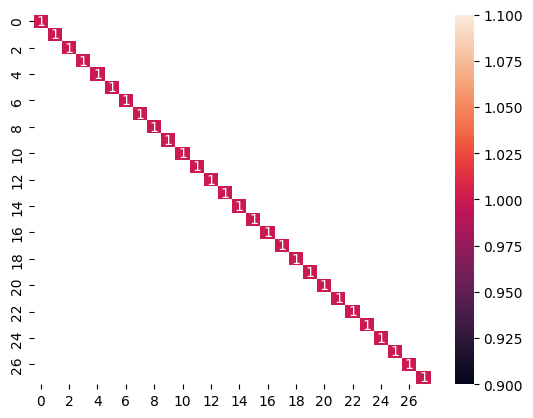

In [71]:
vcorr=df_pca_CC.corr()
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

We can see that there is no strong correlation between the features.

In [72]:
X=df_pca_CC

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8101, 28), (2026, 28), (8101,), (2026,))

## 7.Scaling the data

In [75]:
mn=MinMaxScaler()

X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

## 8.Setting the best parameters

In [76]:
#GridSearchCV

In [77]:
rf=RandomForestClassifier()

rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [78]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [79]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [80]:
print('Best Parameters are: ',gs_model.best_params_)

Best Parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 85}


In [81]:
#finding the no. of neighbors for KNN classifier

In [82]:
k_values=range(3,21)

In [83]:
acc_score={}

In [84]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [85]:
max(acc_score.values())

0.8558736426456071

In [86]:
max(acc_score,key=acc_score.get)

9

## 9.Model Building

In [87]:
models=[LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=85,min_samples_split=20,max_depth=10),XGBClassifier(dual=False),
       KNeighborsClassifier(n_neighbors=9),AdaBoostClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),CatBoostClassifier(),SVC(kernel='linear'),SVC(kernel='rbf'),SVC(kernel='sigmoid'),SVC(kernel='poly'),GaussianNB()]

In [88]:
for i in range(16):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy Score',accuracy_score(y_test,y_pred))
    print('Recall Score',recall_score(y_test,y_pred))
    print('Precision Score',precision_score(y_test,y_pred))
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

LogisticRegression(): 
Accuracy Score 0.8835143139190523
Recall Score 0.38837920489296635
Precision Score 0.7791411042944786
Confusion Matrix: 
[[1663   36]
 [ 200  127]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1699
           1       0.78      0.39      0.52       327

    accuracy                           0.88      2026
   macro avg       0.84      0.68      0.73      2026
weighted avg       0.87      0.88      0.87      2026


SGDClassifier(): 
Accuracy Score 0.8874629812438302
Recall Score 0.42201834862385323
Precision Score 0.7796610169491526
Confusion Matrix: 
[[1660   39]
 [ 189  138]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1699
           1       0.78      0.42      0.55       327

    accuracy                           0.89      2026
   macro avg       0.84      0.70      0.74      2026
weighted avg   

We can find that with CatBoostClassifier model, we can get an accuracy of 90% but the recall value is 51% approx. Let us try with Stacking.

## 10.Stacking

In [89]:
stack=StackingClassifier(classifiers=[XGBClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
LGBMClassifier(),CatBoostClassifier(),SVC(kernel='poly'),GaussianNB()],meta_classifier=CatBoostClassifier())

In [90]:
model_stack=stack.fit(X_train_scaled,y_train)

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705
Learning rate set to 0.02517
0:	learn: 0.6708573	total: 12.1ms	remaining: 12.1s
1:	learn: 0.6500616	total: 19.6ms	remaining: 9.79s
2:	learn: 0.6292795	total: 28.3ms	remaining: 9.4s
3:	learn: 0.6129062	total: 34.9ms	remaining: 8.7s
4:	learn: 0.5937011	total: 41.8ms	remaining: 8.32s
5:	learn: 0.5768863	total: 47.8ms	remaining: 7.92s
6:	learn: 0.5599483	total: 55.7ms	remaining: 7.9s
7:	learn: 0.5457709	total: 63.5ms	remaining: 7.88s
8:	learn: 0.5307753	total: 71.3ms	remaining: 7.85s
9:	learn: 0.5183587	tota

In [91]:
stack_pred=model_stack.predict(X_test_scaled)

In [92]:
print('Accuracy: ',accuracy_score(y_test,stack_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,stack_pred))
print('Recall Score: ',recall_score(y_test,stack_pred))
print('Precision Score: ',precision_score(y_test,stack_pred))
print('Classification Report: ')
print(classification_report(y_test,stack_pred))

Accuracy:  0.8998025666337611
Confusion Matrix: 
[[1654   45]
 [ 158  169]]
Recall Score:  0.5168195718654435
Precision Score:  0.7897196261682243
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1699
           1       0.79      0.52      0.62       327

    accuracy                           0.90      2026
   macro avg       0.85      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



We can see that with Stacking, we are getting a recall score of 52% approx.Finally, we will try with Neural Network

## 11.Neural Network

In [93]:
X_train_scaled.shape

(8101, 28)

In [94]:
classifier=Sequential()

In [95]:
classifier.add(Dense(128,kernel_initializer='uniform',activation='relu',input_dim=28))
Dropout(0.20)
classifier.add(Dense(64,kernel_initializer='uniform',activation='relu'))
Dropout(0.10)

In [96]:
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [97]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3712      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
es=EarlyStopping(monitor='loss',patience=3)

In [100]:
h_callback=classifier.fit(X_train_scaled,y_train,batch_size=32,epochs=100,validation_data=[X_train_scaled,y_train],callbacks=es)

Epoch 1/100
254/254 [==============================] - 2s 4ms/step - loss: 0.4529 - accuracy: 0.8372 - val_loss: 0.4054 - val_accuracy: 0.8395
Epoch 2/100
254/254 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8592 - val_loss: 0.3041 - val_accuracy: 0.8891
Epoch 3/100
254/254 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.8873 - val_loss: 0.2953 - val_accuracy: 0.8912
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 0.2978 - accuracy: 0.8882 - val_loss: 0.2992 - val_accuracy: 0.8867
Epoch 5/100
254/254 [==============================] - 1s 3ms/step - loss: 0.2946 - accuracy: 0.8900 - val_loss: 0.2853 - val_accuracy: 0.8929
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.2924 - accuracy: 0.8896 - val_loss: 0.2846 - val_accuracy: 0.8943
Epoch 7/100
254/254 [==============================] - 1s 3ms/step - loss: 0.2900 - accuracy: 0.8906 - val_loss: 0.2987 - val_accuracy: 0.8863

In [101]:
y_pred=classifier.predict(X_test_scaled)

64/64 [==============================] - 0s 1ms/step


In [102]:
y_pred=np.round(y_pred)

In [103]:
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Accuracy:  0.9220138203356367
Confusion Matrix: 
[[1626   73]
 [  85  242]]
Recall Score:  0.7400611620795107
Precision Score:  0.7682539682539683
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1699
           1       0.77      0.74      0.75       327

    accuracy                           0.92      2026
   macro avg       0.86      0.85      0.85      2026
weighted avg       0.92      0.92      0.92      2026



We can see that the model accuracy has increased to 92%, and the recall score has improved to 74%.

In [104]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
#Plotting the accuracy graph

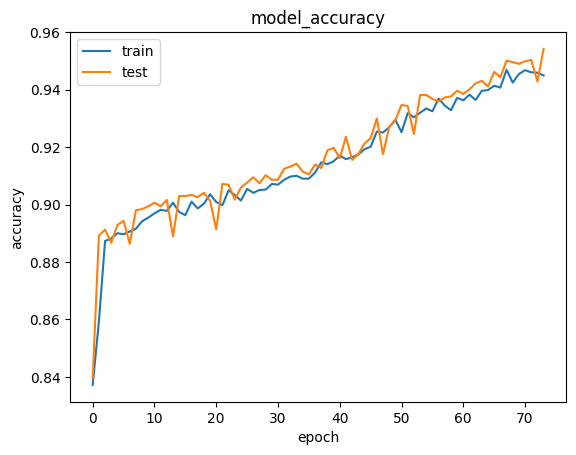

In [106]:
plt.plot(h_callback.history['accuracy'])
plt.plot(h_callback.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [107]:
#Plotting the loss graph

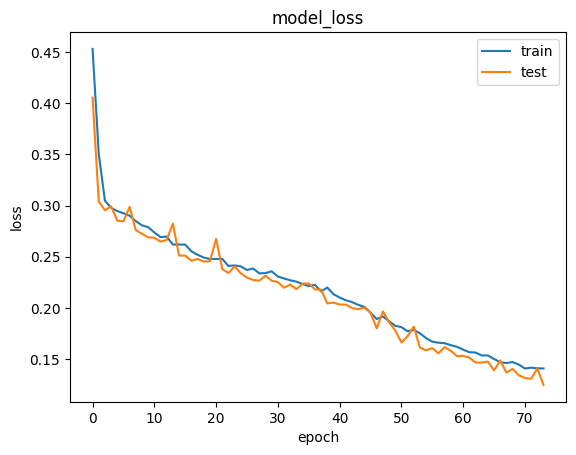

In [108]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()